In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy import random
import seaborn as sns

# Initialization


In [ ]:
# Was lui en had geen zin in een if of for
def plot_dens3(x):
  plt.hist(hist, color = ['b', 'r', 'y'], edgecolor = 'black',
          bins = int(180/5))

  sns.distplot(hist, hist=True, kde=False, 
              bins=int(180/5), color = 'blue',
              hist_kws={'edgecolor':'black'})

  plt.title('Histogram of density')
  plt.xlabel('Binned values')
  plt.ylabel('Amount')

def plot_dens2(x):
  plt.hist(hist, color = ['blue', 'red'], 
           bins = int(180/5))

  # sns.distplot(hist, hist=True, kde=False, 
  #             bins=int(180/5), color = 'blue',
  #             hist_kws={'edgecolor':'black'})

  plt.title('Histogram of X and Y density')
  plt.xlabel('Binned values of X and Y')
  plt.ylabel('Amount')

def plot_dens1(x):
  plt.hist(hist, color = ['b'], edgecolor = 'black',
          bins = int(180/5))

  sns.distplot(hist, hist=True, kde=False, 
              bins=int(180/5), color = 'blue',
              hist_kws={'edgecolor':'black'})

  plt.title('Histogram of density')
  plt.xlabel('Binned values')
  plt.ylabel('Amount')

In [ ]:
A = np.array([[250.25, -249.75],[ -249.75, 250.25]])

def gaussian(mu = 0, sigma = 1):
  return np.random.normal(mu, sigma, 2)

# x' interperted as x transposed
def p_dens(x):
  E = 1/2 * np.dot(np.transpose(x),np.dot(A,x))
  return np.exp(-E)

def accept(a):
  if np.isnan(a):
    return 0
  return np.random.binomial(1, min(a,1))

# Metropalis Hasting

In [ ]:
def plot_scatter(X):
 # colors = np.random.rand(len(hist))
 # area = (30 * np.random.rand(len(hist)))**2  # 0 to 15 point radii

  x = []
  y = []

  for i in X:
    x.append(i[0])
    y.append(i[1])

  plt.scatter(x, y)
  plt.show()

def metropalis_hasting(steps, sigma, grid = False):
  rejections = 0
  x_hist = []
  init_x = gaussian(sigma)
  x = init_x
  for i in range(steps):
    x_new = gaussian(x, 0.1)
    a = p_dens(x_new)/p_dens(x) 
    if accept(a) == 1:
      x = x_new
      x_hist.append(x)
    else:
      rejections += 1
      x_hist.append(x)
  if grid:
    plot_scatter(x_hist)
  return (rejections, np.array(x_hist))

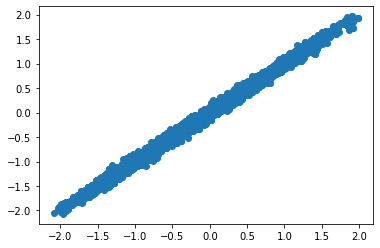

Rejections: 5387
[[0.41249015 0.40596442]
 [0.41249015 0.40596442]
 [0.31347433 0.29078822]
 ...
 [1.34440108 1.33168547]
 [1.34440108 1.33168547]
 [1.44175458 1.44767951]]


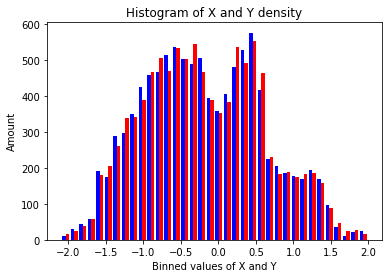

In [ ]:
rejections, hist = metropalis_hasting(10000, 0.1, True)
print("Rejections: {}".format(rejections))
print(hist)

plot_dens2(hist)

# Hamilton Monte Carlo

In [ ]:
def Energy(x):
  return 1/2 * np.dot(np.transpose(x),np.dot(A,x))

def gradientE(x):
  g=np.array([x[0]*250.25-249.75*x[1],x[1]*250.25-249.75*x[0]])
  return g

def hamilton_monte_carlo(steps, tau, epsilon, sigmav, grid = False):
  x = gaussian(sigma = sigmav)
  x_hist = np.array([])
  g = gradientE(x)
  E = Energy(x)
  rejections=0

  for l in range(steps):
    p = np.random.normal(0, 1, len(x))
    H = np.dot(np.transpose(p), p) / 2 + Energy(x)
    xnew = x
    gnew = g

    for s in range(tau):
      p = p - epsilon * gnew /2
      xnew = xnew + epsilon * p #!!!!!!!!!!!!!! += caused the error DO NOT USE
      gnew = gradientE(xnew)
      p = p - epsilon * gnew /2
    
    Enew = Energy(xnew)
    Hnew = np.dot(np.transpose(p), p) /2 + Enew
    dH = Hnew - H

    accept = False
    if dH < 0: 
      accept = True
    elif np.random.uniform(0,1) < np.exp(-dH):
      accept = True
    else:
      accept = False
    if accept:
      g = gnew
      x = xnew
      E = Enew
    else:
      rejections+=1

    x_hist = np.append(x_hist, x)
  if grid:
    plot_scatter(np.array(np.split(x_hist, steps)))
  return rejections, np.array(np.split(x_hist, steps))

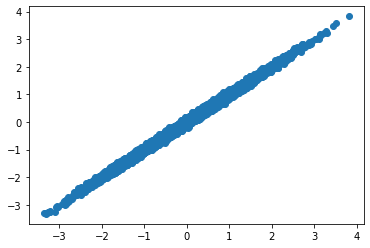

Rejections: 21


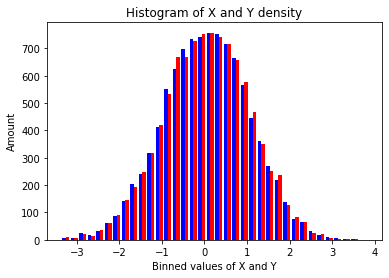

In [ ]:
rejections, hist = hamilton_monte_carlo(10000,100,0.01,0.1, True)
print("Rejections: {}".format(rejections))
# print(hist)
plot_dens2(hist)

In [ ]:
def plot_metropalis_to_img(X, steps, sigma):
  x = []
  y = []
  
  for i in X:
    x.append(i[0])
    y.append(i[1])
  plt.ioff()
  plt.figure() 
  plt.title("Metropalis-Hasting steps: {}, sigma: {}".format(steps, sigma))
  plt.scatter(x, y)
  plt.savefig('Images/MH/Metropalis_Hasting_steps_{}_sigma_{}.png'.format(steps, sigma))

def plot_hamilton_to_img(X, steps, tau, epsilon, sigma):
  x = []
  y = []

  for i in X:
    x.append(i[0])
    y.append(i[1])
  plt.ioff()
  plt.figure() 
  plt.title("Hamilton MC steps: {}, tau: {}, epsilon: {}, sigma: {}".format(steps, tau, epsilon, sigma))
  plt.scatter(x, y)
  plt.savefig('Images/MC/Hamilton_MC_steps_{}_tau_{}_epsilon_{}_sigma_{}.png'.format(steps, tau, epsilon, sigma))

In [ ]:
steps = [10000]
sigma = [0.1, 0.5, 1]
epsilon = [0.01, 0.05, 0.1, 0.5]
tau = [10, 50, 100]

dictMH = list( {} for i in range(len(steps)* len(sigma)) )
MH_counter = 0
for step in steps:
  for s in sigma:
    rejections, hist = metropalis_hasting(step, s)
    dictMH[MH_counter]["rejections"] = rejections
    dictMH[MH_counter]["step"] = step
    dictMH[MH_counter]["sigma"] = s
    dictMH[MH_counter]["hist"] = hist
    dictMH[MH_counter]["ratio"] = rejections/step
    MH_counter += 1

    # plot_metropalis_to_img(hist, step, s)

dictHMC = list({} for i in range(len(steps)* len(sigma) * len(epsilon) * len(tau)))
HMC_counter = 0
for step in steps:
  for frogStep in tau:
    for e in epsilon:
      for s in sigma:
        rejections, hist = hamilton_monte_carlo(step, frogStep, e, s)
        dictHMC[HMC_counter]["rejections"] = rejections
        dictHMC[HMC_counter]["step"] = step
        dictHMC[HMC_counter]["sigma"] = s
        dictHMC[HMC_counter]["epsilon"] = e
        dictHMC[HMC_counter]["tau"] = frogStep
        dictHMC[HMC_counter]["hist"] = hist
        dictHMC[HMC_counter]["ratio"] = rejections/step

        HMC_counter += 1
        # plot_hamilton_to_img(hist, step, frogStep, e, s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


In [ ]:
minMH = min(dictMH, key=lambda x:x['ratio'])
maxMH = max(dictMH, key=lambda x:x['ratio'])
print(minMH)
for i in dictMH:  
  print(i['rejections'])

minHMC = min(dictHMC, key=lambda x:x['ratio'])
maxHMC = max(dictHMC, key=lambda x:x['ratio'])
print(minHMC)
# print(maxHMC)
print(minMH)
for i in dictHMC:  
  print("Rejections: {}, epsilon: {}, sigma: {}, tau: {}".format(i['rejections'],i['epsilon'],i['sigma'],i['tau']))

# For latex table
for i in dictHMC:  
  print(repr("{} & {} & {} & {} \newline".format(i['sigma'],i['epsilon'],i['tau'],i['rejections'])))



{'rejections': 5342, 'step': 10000, 'sigma': 1, 'hist': array([[ 1.1804736 , -0.05277762],
       [ 1.1804736 , -0.05277762],
       [ 1.1804736 , -0.05277762],
       ...,
       [ 1.22359311,  1.12939037],
       [ 1.22359311,  1.12939037],
       [ 1.2052643 ,  1.15470842]]), 'ratio': 0.5342}
5426
5354
5342
{'rejections': 10, 'step': 10000, 'sigma': 0.5, 'epsilon': 0.01, 'tau': 100, 'hist': array([[-0.27473545,  0.39661109],
       [ 0.13608467, -0.47517201],
       [-0.61953335, -0.11329291],
       ...,
       [-0.43126346, -0.39488372],
       [-0.58776697, -0.64180681],
       [-0.88873921, -0.86923589]]), 'ratio': 0.001}
{'rejections': 5342, 'step': 10000, 'sigma': 1, 'hist': array([[ 1.1804736 , -0.05277762],
       [ 1.1804736 , -0.05277762],
       [ 1.1804736 , -0.05277762],
       ...,
       [ 1.22359311,  1.12939037],
       [ 1.22359311,  1.12939037],
       [ 1.2052643 ,  1.15470842]]), 'ratio': 0.5342}
Rejections: 35, epsilon: 0.01, sigma: 0.1, tau: 10
Rejections: 21,

In [ ]:
rejections_ep = np.array([])
epsilon_test = np.linspace(0.01, 0.1, num=50)
for e in epsilon_test:
  rejections, hist = hamilton_monte_carlo(1000, 50, e, 0.1)
  rejections_ep = np.append(rejections_ep, rejections)

In [ ]:
rejections_sigma = np.array([])
sigma_test = np.linspace(0.1, 20, num=50)
for e in sigma_test:
  rejections, hist = hamilton_monte_carlo(1000, 50, 0.01, e)
  rejections_sigma = np.append(rejections_sigma, rejections)

In [ ]:
rejections_tau = np.array([])
tau_test = np.linspace(0, 10000, num=10)
for e in tau_test:
  rejections, hist = hamilton_monte_carlo(1000, int(e), 0.01, 0.1)
  rejections_tau = np.append(rejections_tau, rejections)

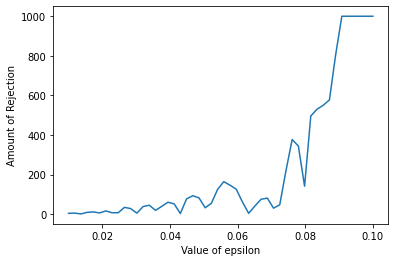

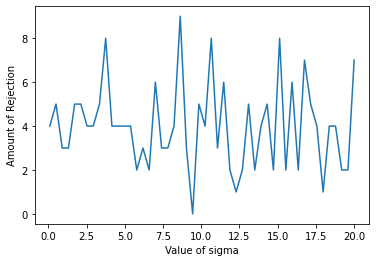

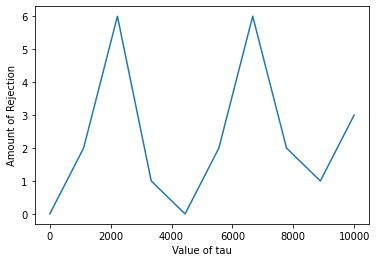

In [ ]:
plt.plot(epsilon_test, rejections_ep)
plt.xlabel('Value of epsilon')
plt.ylabel('Amount of Rejection')
plt.show()

plt.plot(sigma_test, rejections_sigma)
plt.xlabel('Value of sigma')
plt.ylabel('Amount of Rejection')
plt.show()

plt.plot(tau_test, rejections_tau)
plt.xlabel('Value of tau')
plt.ylabel('Amount of Rejection')
plt.show()
